## Washington Bike Demand Prediction 

In this machine learning project, the demand for the bikes would be predicted using different machine learning techniques. There are different bike rental companies such as Zagster and City Bikes and there would be a great business value for the companies if they were to predict the demand for bikes for particular instances of time and other features such as temperature and windspeed. Therefore, it would be important to understand the demand for bikes during different instances of time so that they would be able to understand the demand and ensure that people are getting their rides respectively. 

As a result, this would lead to growth in companies so that they ensure that they get the best profits, along with ensuring that people get bikes as and when needed during different instances of time. 

In the project, we would be working with the washington bike demand dataset and understand some of the features present in them. Later, we would add a few additional features so that we get get a good estimate of different parameters that need to be taken into consideration when implementing visualization and different machine learning and deep learning algorithms. Finally, we would plot the graphs of the predictions and the actual values to get an understanding of how well our model did not just on the training data but the best data respectively. 

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

We would be reading the data that is present in hour.csv file. 

In [6]:
df = pd.read_csv('hour.csv')

Exploring the head of the dataframe just to see some columns that we would be working with and the values present in them. 

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


It is important to explore the shape of the data to understand the rows and columns present in the data. 

In [8]:
df.shape

(17379, 17)

It would be better to understand the data and check how the values are spread out by understanding the quartiles and the minimum value and maximum value respectively. Below, we would be looking at different numerical features and see how the features are spread. 

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


We would check the null and non-null values just to ensure that we are working with the right data. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# We are trying to access the days in the date column as can be seen below. We would store it in day column 
df['day']= df['dteday'].apply(lambda x: x[8:])

In [13]:
df['day']

0        01
1        01
2        01
3        01
4        01
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: object

In [14]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [15]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01


Looking at the different unique seasons to understand the data. 

In [16]:
print("The different unique numerical values present in Season feature are: {}".format(df['season'].unique()))

The different unique numerical values present in Season feature are: [1 2 3 4]


In [17]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [18]:
season_dict

{1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [19]:
df['Season_cat'] = df['season'].map(season_dict)

In [20]:
df['Season_cat']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17374    Spring
17375    Spring
17376    Spring
17377    Spring
17378    Spring
Name: Season_cat, Length: 17379, dtype: object

In [21]:
df['Season_cat'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

## Countplot of Different Seasons 
We see below the count of different seasons and can understand that there are slightly more fall values compared to the other seasons. That is because of the variation in the number of days present every month. Therefore, we can get a good idea about the demand of cycles based on the seasonal data respectively.

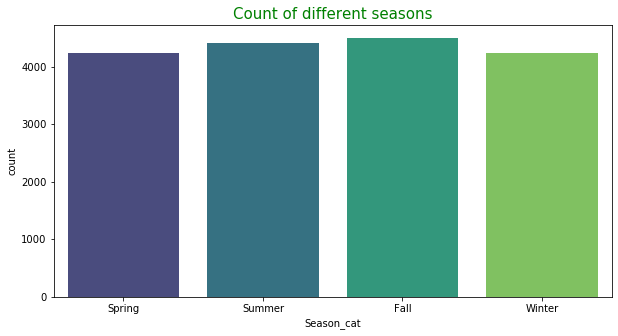

In [22]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Season_cat', palette = 'viridis', saturation = 0.75)
plt.title("Count of different seasons", color = 'green', fontsize = 15)
plt.show()

In [23]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,Spring


## Plot for Average Demand for Bikes during different seasons

We can infer from the below that there is a good demand for bikes in the fall season compared to the other seasons. It is also observed that spring season has the least demand for bikes.

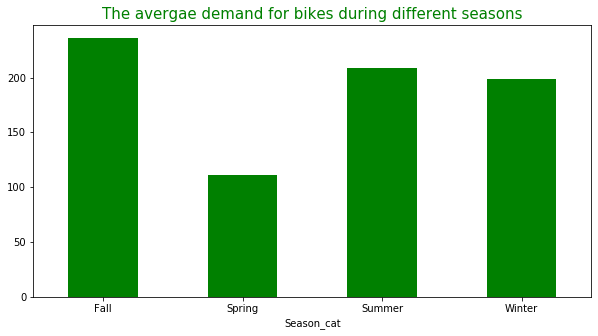

In [24]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).mean()['cnt'].plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The avergae demand for bikes during different seasons", fontsize = 15, color = 'green')
plt.show()

## Total Demand for Bikes for different seasons

From the below values, we can see that the fall has the highest demand for the bikes. On the contrary, we also can see that spring has the lowest values for the demand for bikes. We can therefore infer that there would be a good demand for bikes during the fall season respectively and quite a low demand for bikes during the spring season respectively.

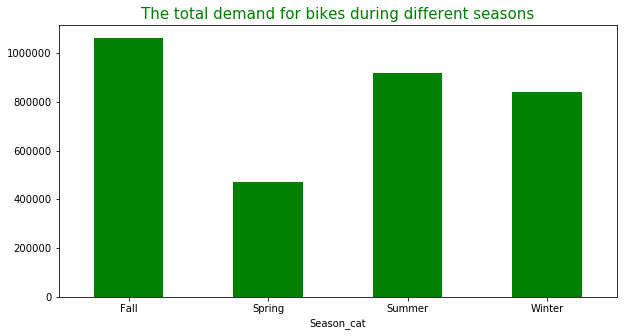

In [25]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).sum()['cnt'].plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The total demand for bikes during different seasons", fontsize = 15, color = 'green')
plt.show()

In [26]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["Month_cat"] = df['mnth'].map(month_dict)

In [27]:
df["Month_cat"]

0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: Month_cat, Length: 17379, dtype: object

## Countplot of Different Months

We can see the graph below which shows the total values present for different months respectively. As a result, we can tell that there are some months that have less days and therefore, their values are bit lower than those months which has more days. 

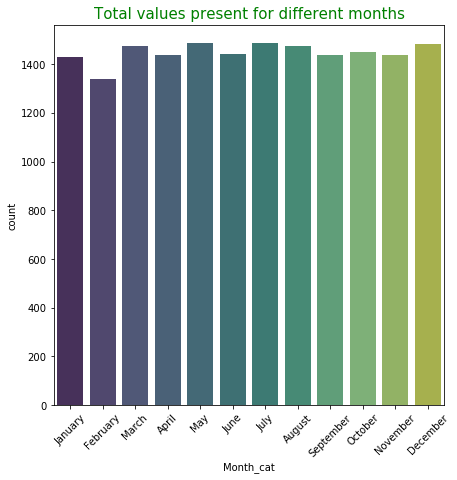

In [28]:
plt.figure(figsize = (7, 7))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'Month_cat', palette = 'viridis', saturation = 0.5) 
plt.title("Total values present for different months", fontsize = 15, color = 'green')
plt.show()


## Average Demand for Bikes for Different Months

There is highest demand for bikes during the month September, June and August respectively. We see that there are other months that have quite a low demand compared to the others. We also see that January has the lowest demand for the average bikes. Therefore, actions must be taken during September as there would be quite a high demand for bikes respectively. In the month of January, however, we see that there is a low demand for bikes. Hence, those bikes can be put in a different location to ensure that people receive the bikes as and when required. 

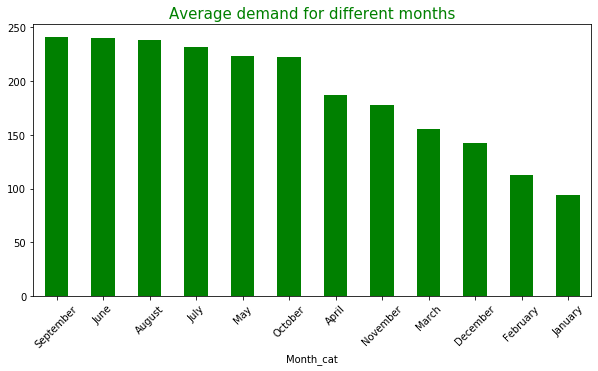

In [29]:
plt.figure(figsize = (10, 5))
df.groupby(['Month_cat']).mean()['cnt'].sort_values(ascending = False).plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 45)
plt.title("Average demand for different months", fontsize = 15, color = 'green')
plt.show()

## Distribution of Windspeed 

Taking a look at the distribution of the values, we see that most of the values that we are working with in terms of windspeed is with lower speeds. There are quite a few extreme values that are present. Therefore, most of the values that we are dealing in the dataset have values of windspeed that are not quite high respectively.

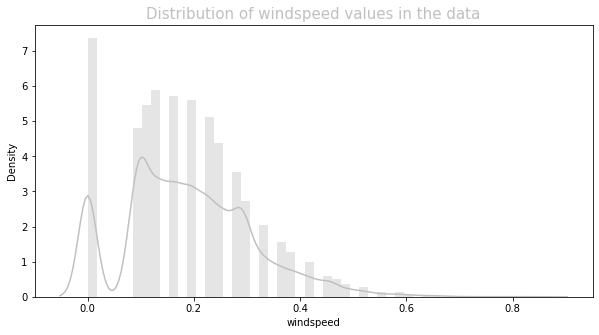

In [30]:
plt.figure(figsize = (10, 5))
sns.distplot(df['windspeed'], color = 'silver')
plt.title("Distribution of windspeed values in the data", fontsize = 15, color = 'silver')
plt.show()

## Distribution of Temperature Values 

As can be seen, the temperature values are quite evenly distributed. Therefore, we can be working with the temperature values that are quite evenly distributed. This would ensure that we get the demand for different temperature values respectively. 

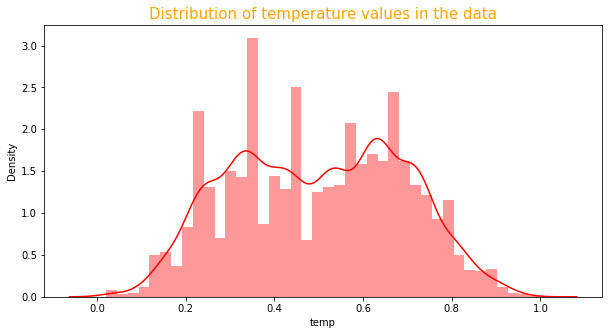

In [90]:
plt.figure(figsize = (10, 5))
sns.distplot(df['temp'], color = 'red')
plt.title("Distribution of temperature values in the data", fontsize = 15, color = 'orange')
plt.show()

In [91]:

def temperature_converter(value):
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    return (value * (temp_max - temp_min) + temp_min)

In [92]:
df['Temperature_converted'] = df['temp'].apply(temperature_converter)

In [93]:
df['Temperature_converted']

0        0.2552
1        0.2356
2        0.2356
3        0.2552
4        0.2552
          ...  
17374    0.2748
17375    0.2748
17376    0.2748
17377    0.2748
17378    0.2748
Name: Temperature_converted, Length: 17379, dtype: float64

## Total Demand for Bikes during Different Hours

We see that the the total demand for bikes is highest at 5 pm washington time. As can be seen, there is quite a low demand for bikes early in the morning starting from 1 am to 7 am respectively. In addition to this, we can also see that there is a high demand for bikes starting from 8 am and the demand keeps increasing respectively. 

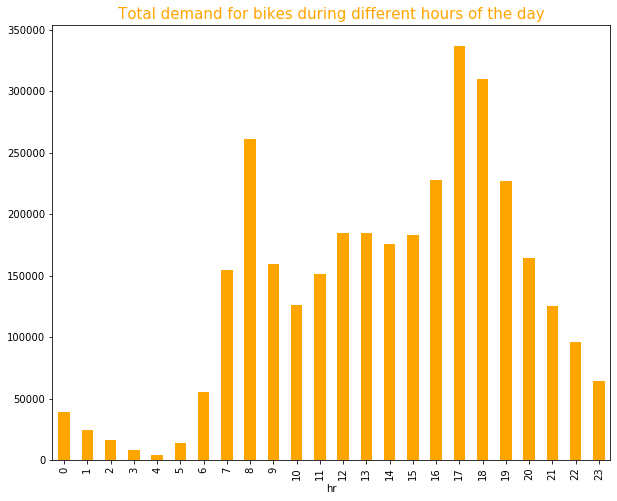

In [36]:
plt.figure(figsize = (10, 8))
df.groupby(['hr'])['cnt'].sum().plot(kind = 'bar', color = 'orange')
plt.title("Total demand for bikes during different hours of the day", fontsize = 15, color = 'orange')
plt.show()

## Distribution of Humidity values 

We can see that there is a good distribution of humidity values present and they are quite evenly distributed respectively. There is quite a bit of a left shift in the data. 

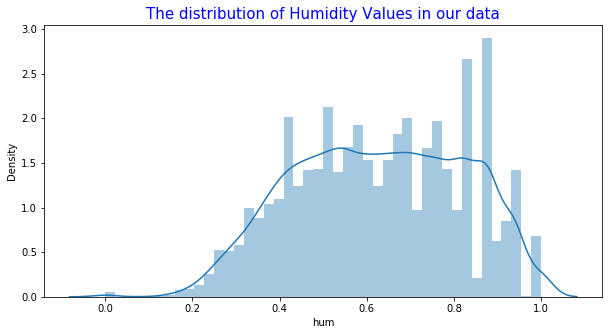

In [89]:
plt.figure(figsize = (10, 5))
sns.distplot(df['hum'])
plt.title("The distribution of Humidity Values in our data", fontsize = 15, color = 'blue')
plt.show()

## Scatterplot between Demand and Registered Users

As can be seen, as the number of people registered increases, there is a very possibility for the demand for bikes to increase respectively. When the number of registered users is low, we see that the total demand of bikes is due to casual riders. One can infer from this data that as the number of registered users and regisetered bikes increases, there is a possibility that the demand created is mainly due to registered users. If the registered users are low, we see that the demand is created not just by the registered users but also by casual riders respectively.

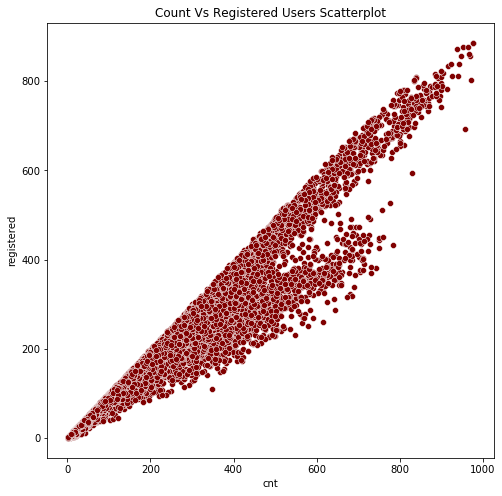

In [38]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'cnt', y = 'registered', data = df, color = 'maroon', marker = 'o')
plt.title('Count Vs Registered Users Scatterplot')
plt.show()

In [39]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


In [ ]:
plt.figure(figsize = (8, 8))
sns.kdeplot(df['casual'], color = 'yellow')

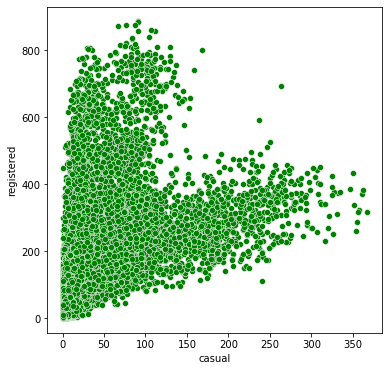

In [41]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'casual', y = 'registered', color = 'green', data = df)
plt.show()

In [42]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [43]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


In [44]:
def temperature_segments(value):
    if value < 0.2:
        return 0.1
    elif value < 0.4 and value > 0.2:
        return 0.3
    elif value < 0.6 and value > 0.4:
        return 0.5
    elif value < 0.7 and value > 0.5:
        return 0.6
    elif value < 0.8 and value > 0.6:
        return 0.7
    elif value < 0.9 and value > 0.7:
        return 0.8
    else:
        return 0.9

In [45]:
df['Temperature_segments'] = df['temp'].apply(temperature_segments)

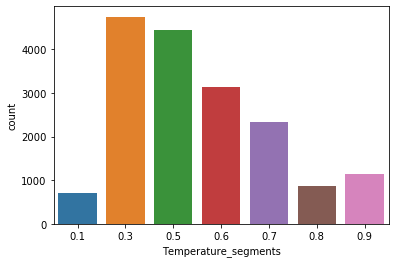

In [46]:
sns.countplot(df['Temperature_segments'])

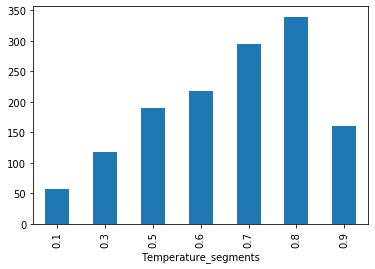

In [47]:
df.groupby(['Temperature_segments']).mean()['cnt'].plot(kind = 'bar')

In [48]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


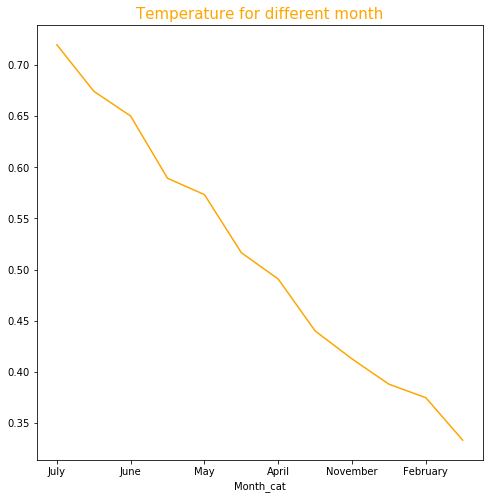

In [57]:
plt.figure(figsize = (8, 8))
df.groupby(['Month_cat']).mean()['Temperature_segments'].sort_values(ascending = False).plot(kind = 'line', color = 'orange')
plt.title("Temperature for different month", color = 'orange', fontsize = 15)
plt.show()

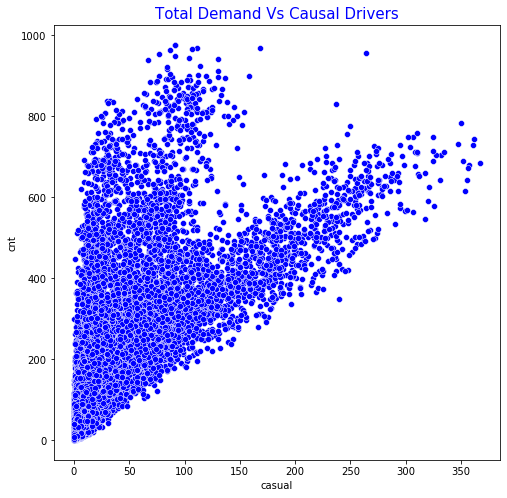

In [63]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'casual', y = 'cnt', data = df, color = 'blue')
plt.title("Total Demand Vs Causal Drivers", fontsize = 15, color = 'blue')
plt.show()

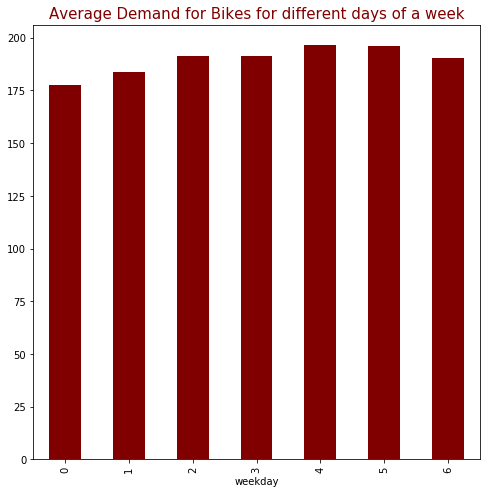

In [68]:
plt.figure(figsize = (8, 8))
df.groupby(['weekday']).mean()['cnt'].plot(kind = 'bar', color = 'maroon')
plt.title("Average Demand for Bikes for different days of a week", fontsize = 15, color  = 'maroon')
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [70]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


In [71]:
df.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)

In [72]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,0.2552,0.3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [74]:
df['day'] = df['day'].apply(lambda x: int(x))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [76]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0.2552,0.3


In [77]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [78]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [79]:
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [80]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


## Machine learning Analysis 

In [81]:
X = df.drop(['cnt'], axis = 1).values
y = df['cnt'].values

In [82]:
X[0: 5]

array([[1.    , 0.    , 1.    , 0.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.81  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 1.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 2.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 3.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 4.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ]])

In [83]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [84]:
X_train.shape

(12165, 15)

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)

In [86]:
X_train.shape

(12165, 15)

In [87]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['MSE', 'MAE'])

Instructions for updating:
Colocations handled automatically by placer.


In [88]:
model.fit(X_train, y_train, epochs = 200, verbose = 1, validation_data = (X_cv, y_cv))

Instructions for updating:
Use tf.cast instead.
Train on 12165 samples, validate on 5214 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
12165/12165 [==============================] - 3s 281us/sample - loss: 33472.9558 - mean_squared_error: 33472.9609 - mean_absolute_error: 133.8974 - val_loss: 20397.4825 - val_mean_squared_error: 20397.4766 - val_mean_absolute_error: 109.2554
Epoch 2/200
12165/12165 [==============================] - 3s 266us/sample - loss: 19887.2523 - mean_squared_error: 19887.2578 - mean_absolute_error: 103.4122 - val_loss: 18972.6171 - val_mean_squared_error: 18972.6191 - val_mean_absolute_error: 98.6573
Epoch 3/200
12165/12165 [==============================] - 3s 258us/sample - loss: 18527.8969 - mean_squared_error: 18527.9004 - mean_absolute_error: 98.5208 - val_loss: 17503.0012 - val_mean_squared_error: 17503.0020 - val_mean_absolute_error: 94.9883
Epoch 4/200
12165/12165 [==============================] - 3s 261us/sample - loss: 16913.0072

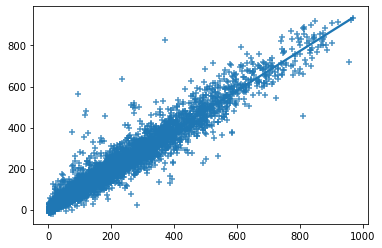

In [68]:
sns.regplot(y_cv, model.predict(X_cv), marker = '+')

In [69]:
model = KNeighborsRegressor()
mean_squared_error_list = []
mean_absolute_error_list = []
roc_auc_score_list = []
K_nearest_neighbors = [2, 3, 5, 8, 10, 11, 15, 20]
for i in K_nearest_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    

In [70]:
knn_dictionary = {'K Nearest Neighbors': K_nearest_neighbors, 'Mean Squared Error': mean_squared_error_list, 'Mean Absolute Error': mean_absolute_error_list}

In [71]:
knn_dataframe = pd.DataFrame(knn_dictionary)

In [72]:
knn_dataframe

,K Nearest Neighbors,Mean Squared Error,Mean Absolute Error
0,2,12945.093019,72.424051
1,3,12987.864808,74.539957
2,5,12878.459095,77.040621
3,8,13144.267915,80.213895
4,10,13318.760696,81.887361
5,11,13412.708021,82.678523
6,15,13905.441807,85.297021
7,20,14263.771953,87.384005


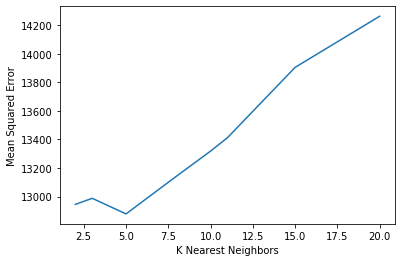

In [73]:
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Squared Error', data = knn_dataframe)
plt.show()

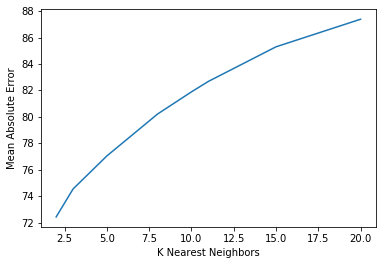

In [74]:
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Absolute Error', data = knn_dataframe)
plt.show()

In [75]:
best_neighbor_index = np.argmin(mean_squared_error_list)

In [76]:
best_neighbor = K_nearest_neighbors[best_neighbor_index]

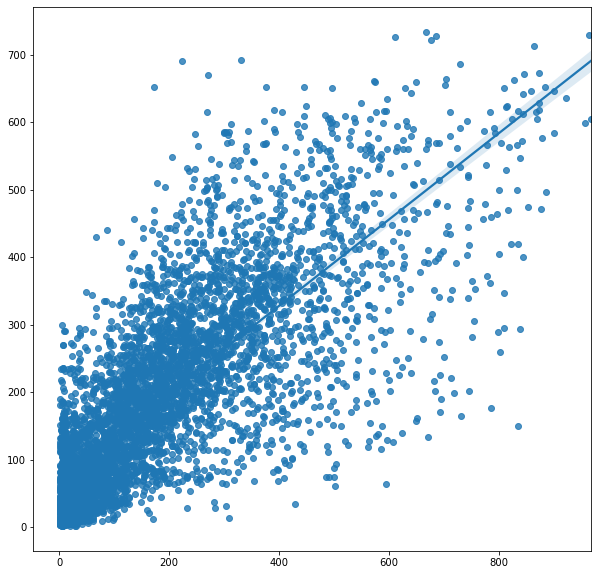

In [77]:
model = KNeighborsRegressor(n_neighbors = best_neighbor)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (10, 10))
sns.regplot(y_cv, y_predict)
plt.show()

In [78]:
n_components_list = [2, 3, 5, 7, 10]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_components_list:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

In [79]:
pls_regression_dict = {'Number of Components': n_components_list, 'Mean Absolute Error': mean_absolute_error_list,
                      'Mean Squared Error': mean_squared_error_list}

In [80]:
pls_regression_dataframe = pd.DataFrame(pls_regression_dict)

In [81]:
pls_regression_dataframe

,Number of Components,Mean Absolute Error,Mean Squared Error
0,2,106.391810,20255.890519
1,3,106.132008,20005.275451
2,5,105.580811,19935.640591
3,7,105.685001,19937.672480
4,10,105.694856,19928.941616


In [82]:
def plot_function(dataframe):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.lineplot(ax = axes[0], x = dataframe.columns[0], y = 'Mean Absolute Error', data = dataframe)
    axes[0].set_title('Number of Components Vs Mean Absolute Error', fontsize = 15)
    sns.lineplot(ax = axes[1], x = dataframe.columns[0], y = 'Mean Squared Error', data = dataframe)
    axes[1].set_title('Number of Components Vs Mean Squared Error', fontsize = 15)
    fig.suptitle("There are the result plots", fontsize = 15)
    fig.tight_layout()

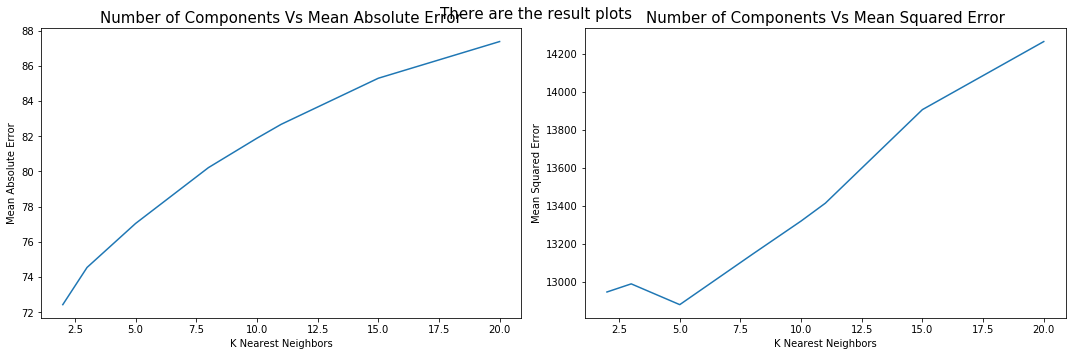

In [83]:
plot_function(knn_dataframe)

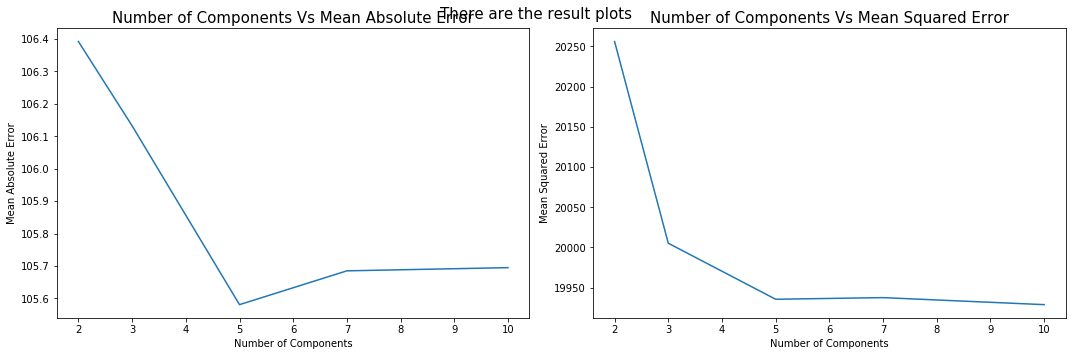

In [84]:
plot_function(pls_regression_dataframe)

In [85]:
max_depth_list = [10, 15, 16, 17, 18, 20, 25]
mean_absolute_error_list = []
mean_squared_error_list = []
for i in max_depth_list:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
decision_tree_dict = {'Max Depth': max_depth_list, 'Mean Absolute Error': mean_absolute_error_list,
                     'Mean Squared Error': mean_squared_error_list}
decision_tree_dataframe = pd.DataFrame(decision_tree_dict)
    

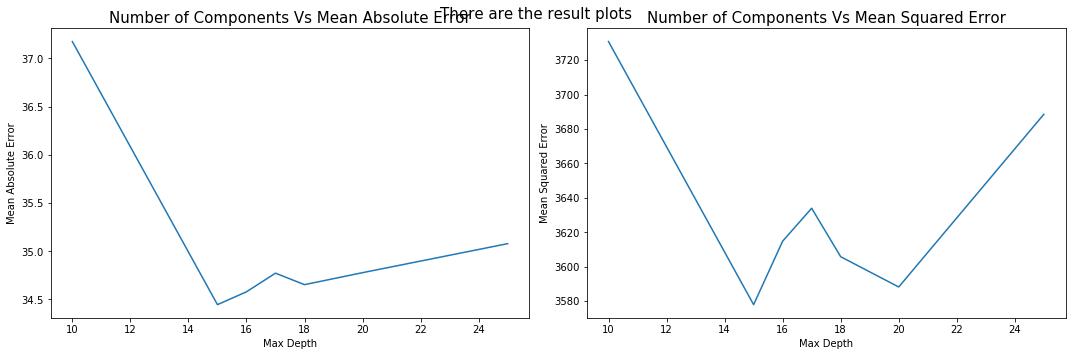

In [86]:
plot_function(decision_tree_dataframe)

In [87]:
best_max_depth_index = np.argmin(mean_absolute_error_list)
best_max_depth = max_depth_list[best_max_depth_index]

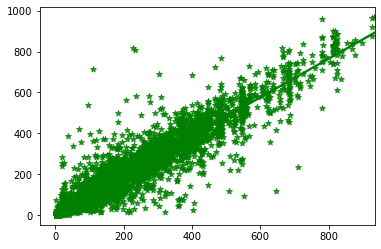

In [88]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
sns.regplot(y_predict, y_cv, marker = '*', color = 'green')
plt.show()

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
n_estimators_list = [25, 50, 100, 150, 200, 400, 1000]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 10)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
    mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))
gradient_boosting_regressor_dict = {"Number of Estimators": n_estimators_list, "Mean Absolute Error": mean_absolute_error_list,
                                   "Mean Squared Error": mean_squared_error_list}
gradient_boosting_regressor_dataframe = pd.DataFrame(gradient_boosting_regressor_dict)

    
    

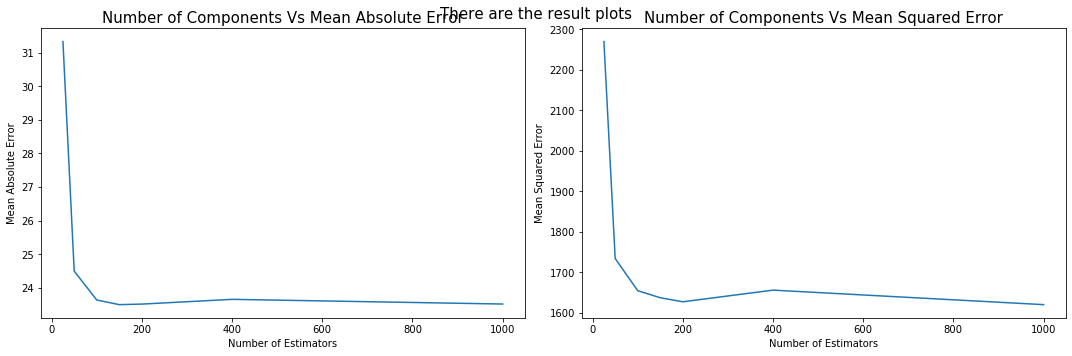

In [91]:
plot_function(gradient_boosting_regressor_dataframe)

In [92]:
gradient_boosting_regressor_dataframe

,Number of Estimators,Mean Absolute Error,Mean Squared Error
0,25,31.328212,2269.299342
1,50,24.497717,1733.727179
2,100,23.638970,1654.392966
3,150,23.500878,1636.921446
4,200,23.517520,1626.950881
5,400,23.658419,1655.734859
6,1000,23.519164,1619.898397


In [93]:
n_estimators_index = np.argmin(mean_squared_error_list)
best_n_estimators = n_estimators_list[n_estimators_index]

In [94]:
model = GradientBoostingRegressor(n_estimators = best_n_estimators, max_depth = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

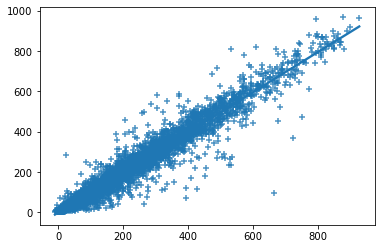

In [95]:
sns.regplot(y_predict, y_cv, marker = '+')
plt.show()

The mean squared error of the linear regression model is 19925.131765106464
The mean absolute error of the linear regression model is 105.67503192823504


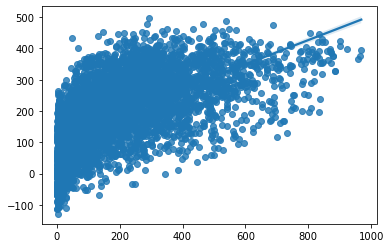

In [96]:
mean_squared_error_list = []
mean_absolute_error_list = []
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
print(f"The mean squared error of the linear regression model is {mean_squared_error_list[0]}")
print(f"The mean absolute error of the linear regression model is {mean_absolute_error_list[0]}")
sns.regplot(y_cv, y_predict)
plt.show()

In [97]:
print("Suhas Madali")

Suhas Madali
